In [1]:
import requests
from bs4 import BeautifulSoup
import re

# Dictionary to map emotions to IMDb URLs
URLS = {
    "Drama": 'https://www.imdb.com/search/title/?title_type=feature&genres=drama',
    "Action": 'https://www.imdb.com/search/title/?title_type=feature&genres=action',
    "Comedy": 'https://www.imdb.com/search/title/?title_type=feature&genres=comedy',
    "Horror": 'https://www.imdb.com/search/title/?title_type=feature&genres=horror',
    "Crime": 'https://www.imdb.com/search/title/?title_type=feature&genres=crime',
}

def main(emotion):
    url = URLS.get(emotion)
    print("ok", url)
    if not url:
        print("Invalid emotion.")
        return []

    headers = {
    'User-Agent':
    'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

    try:
        response = requests.get(url, headers=headers)
        response.raise_for_status()  # Check for HTTP errors
    except requests.RequestException as e:
        print(f"Error fetching data: {e}")
        return []

    soup = BeautifulSoup(response.text, "lxml")

    # Extract movie titles
    titles = [a.get_text() for a in soup.find_all('a', href=re.compile(r'/title/tt\d+/'))]
    return titles

# Driver Function
if __name__ == '__main__':
    emotion = input("Enter the emotion: ").strip()
    movie_titles = main(emotion)

    if not movie_titles:
        print("No titles found.")
    else:
        max_titles = 14 if emotion in ["Drama", "Action", "Comedy", "Horror", "Crime"] else 12
        for title in movie_titles[:max_titles]:
            print(title)


Enter the emotion:  Comedy


ok https://www.imdb.com/search/title/?title_type=feature&genres=comedy

1. The Electric State

2. Anora

3. Mickey 17

4. Freakier Friday

5. Moana 2

6. Novocaine

7. Materialists


In [2]:
import cv2
import requests
import matplotlib.pyplot as plt
from deepface import DeepFace

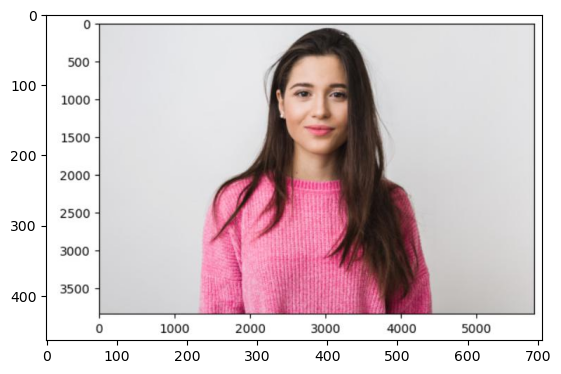

In [3]:
import cv2
import matplotlib.pyplot as plt

# Read the image
img = cv2.imread(r"C:\Users\abish\OneDrive\Desktop\movie recommendation system\uploads\sample.jpg")

# Check if the image was loaded
if img is None:
    print("Error: Image not found or unable to read.")
else:
    # Convert BGR to RGB and display
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()


In [4]:
import deepface
print(deepface.__version__)

0.0.93


In [5]:
pip uninstall deepface

^C
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install deepface

Note: you may need to restart the kernel to use updated packages.


In [7]:
from deepface import DeepFace

In [10]:
import cv2
from deepface import DeepFace

img = cv2.imread(r"C:\Users\abish\OneDrive\Desktop\movie recommendation system\uploads\sample.jpg")
if img is None:
    print("Error: Image not loaded properly.")
else:
    result = DeepFace.analyze(img, actions=['emotion'])
    print(result)


25-03-27 15:06:40 - facial_expression_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: C:\Users\abish\.deepface\weights\facial_expression_model_weights.h5
100%|█████████████████████████████████████████████████████████████████████████████| 5.98M/5.98M [00:02<00:00, 2.89MB/s]


[{'emotion': {'angry': 0.00014434942564556328, 'disgust': 1.5597912780725494e-09, 'fear': 0.0006161067088916473, 'happy': 97.46078237657441, 'sad': 0.002072456969308896, 'surprise': 0.005130387522717753, 'neutral': 2.531249227002217}, 'dominant_emotion': 'happy', 'region': {'x': 325, 'y': 64, 'w': 128, 'h': 128, 'left_eye': (415, 116), 'right_eye': (366, 112)}, 'face_confidence': 0.89}]


In [11]:
DeepFace.analyze(img, actions=['emotion'], detector_backend='opencv')

[{'emotion': {'angry': 0.00014434942564556328,
   'disgust': 1.5597912780725494e-09,
   'fear': 0.0006161067088916473,
   'happy': 97.46078237657441,
   'sad': 0.002072456969308896,
   'surprise': 0.005130387522717753,
   'neutral': 2.531249227002217},
  'dominant_emotion': 'happy',
  'region': {'x': 325,
   'y': 64,
   'w': 128,
   'h': 128,
   'left_eye': (415, 116),
   'right_eye': (366, 112)},
  'face_confidence': 0.89}]

In [12]:
# storing the dictionary of emotions in result
result = DeepFace.analyze(img, actions = ['emotion'])
# print result
print(result)

[{'emotion': {'angry': 0.00014434942564556328, 'disgust': 1.5597912780725494e-09, 'fear': 0.0006161067088916473, 'happy': 97.46078237657441, 'sad': 0.002072456969308896, 'surprise': 0.005130387522717753, 'neutral': 2.531249227002217}, 'dominant_emotion': 'happy', 'region': {'x': 325, 'y': 64, 'w': 128, 'h': 128, 'left_eye': (415, 116), 'right_eye': (366, 112)}, 'face_confidence': 0.89}]


In [13]:
# extracting emotion with highest percentage
query = str(max(zip(result[0]['emotion'].values(),
					result[0]['emotion'].keys()))[1])
print(query)


happy


## Full Code

In [18]:
import requests
from bs4 import BeautifulSoup
import re
from deepface import DeepFace

# Dictionary to map emotions to IMDb URLs
URLS = {
    "angry": 'https://www.imdb.com/search/title/?title_type=feature&genres=action',
    "disgust": 'https://www.imdb.com/search/title/?title_type=feature&genres=horror',
    "fear": 'https://www.imdb.com/search/title/?title_type=feature&genres=horror',
    "happy": 'https://www.imdb.com/search/title/?title_type=feature&genres=comedy',
    "sad": 'https://www.imdb.com/search/title/?title_type=feature&genres=drama',
    "surprise": 'https://www.imdb.com/search/title/?title_type=feature&genres=drama',
    "neutral": 'https://www.imdb.com/search/title/?title_type=feature&genres=drama',
}

def get_emotion_from_image(image_location):
    try:
        # Analyze the image to detect the emotion
        result = DeepFace.analyze(image_location, actions=['emotion'])
        emotion = str(max(zip(result[0]['emotion'].values(), result[0]['emotion'].keys()))[1])
        print(f"Detected emotion: {emotion}")
    except Exception as e:
        print(f"Error detecting emotion: {e}")
        emotion = "neutral"  # Default to "neutral" if emotion detection fails
    return emotion

def get_movie_titles(emotion, url=None):
    url = URLS.get(emotion) if not url else url
    if not url:
        print("Invalid emotion.")
        return []
    
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
    }

    try:
        response = requests.get(url, headers=headers)
        response.raise_for_status()  # Check for HTTP errors
    except requests.RequestException as e:
        print(f"Error fetching data: {e}")
        return []

    soup = BeautifulSoup(response.text, "lxml")
    
    # Extract movie titles
    titles = [a.get_text() for a in soup.find_all('a', href=re.compile(r'/title/tt\d+/'))]
    return titles

def get_movies_for_emotion(image_location, limit=10):
    emotion = get_emotion_from_image(image_location)
    
    # Ensure the emotion is valid, default to "neutral" if not in the predefined emotions
    if emotion not in URLS:
        print(f"Emotion '{emotion}' not mapped, defaulting to 'neutral'.")
        emotion = "neutral"

    movie_titles = get_movie_titles(emotion)
    
    if not movie_titles:
        print("No titles found.")
        return []
    
    max_titles = 14 if emotion in ["happy", "surprise", "angry", "fear"] else 12
    output = []
    
    for i in range(min(limit, len(movie_titles))):
        output.append(f"{movie_titles[i]}")  # Just add the movie title without the prefix
    
    return output

# Example Usage with sample.jpg
if __name__ == '__main__':
    image_location = (r'C:\Users\abish\OneDrive\Desktop\movie recommendation system\uploads\sample.jpg')  
    result = get_movies_for_emotion(image_location)
    
    for item in result:
        print(item)

Detected emotion: happy

1. The Electric State

2. Anora

3. Mickey 17

4. Freakier Friday

5. Moana 2


## Full code

In [20]:
import requests
from bs4 import BeautifulSoup
import re
from deepface import DeepFace
import random  # Import the random module to shuffle the list

# Dictionary to map emotions to IMDb URLs
URLS = {
    "angry": 'https://www.imdb.com/search/title/?title_type=feature&genres=action',
    "disgust": 'https://www.imdb.com/search/title/?title_type=feature&genres=horror',
    "fear": 'https://www.imdb.com/search/title/?title_type=feature&genres=horror',
    "happy": 'https://www.imdb.com/search/title/?title_type=feature&genres=comedy',
    "sad": 'https://www.imdb.com/search/title/?title_type=feature&genres=drama',
    "surprise": 'https://www.imdb.com/search/title/?title_type=feature&genres=drama',
    "neutral": 'https://www.imdb.com/search/title/?title_type=feature&genres=drama',
}

def get_emotion_from_image(image_location):
    try:
        # Analyze the image to detect the emotion
        result = DeepFace.analyze(image_location, actions=['emotion'])
        emotion = str(max(zip(result[0]['emotion'].values(), result[0]['emotion'].keys()))[1])
        print(f"Detected emotion: {emotion}")
    except Exception as e:
        print(f"Error detecting emotion: {e}")
        emotion = "neutral"  # Default to "neutral" if emotion detection fails
    return emotion

def get_movie_titles(emotion, url=None):
    url = URLS.get(emotion) if not url else url
    if not url:
        print("Invalid emotion.")
        return []
    
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
    }

    try:
        response = requests.get(url, headers=headers)
        response.raise_for_status()  # Check for HTTP errors
    except requests.RequestException as e:
        print(f"Error fetching data: {e}")
        return []

    soup = BeautifulSoup(response.text, "lxml")
    
    # Extract movie titles
    titles = [a.get_text() for a in soup.find_all('a', href=re.compile(r'/title/tt\d+/'))]
    return titles

def get_movies_for_emotion(image_location, limit=10):
    emotion = get_emotion_from_image(image_location)
    
    # Ensure the emotion is valid, default to "neutral" if not in the predefined emotions
    if emotion not in URLS:
        print(f"Emotion '{emotion}' not mapped, defaulting to 'neutral'.")
        emotion = "neutral"

    movie_titles = get_movie_titles(emotion)
    
    if not movie_titles:
        print("No titles found.")
        return []
    
    # Shuffle the movie titles randomly
    random.shuffle(movie_titles)

    # Limit the number of titles displayed
    max_titles = 14 if emotion in ["happy", "surprise", "angry", "fear"] else 12
    output = []
    
    for i in range(min(limit, len(movie_titles))):
        output.append(f"{movie_titles[i]}")  # Just add the movie title without the prefix
    
    return output

# Example Usage with sample.jpg
if __name__ == '__main__':
    image_location = (r"C:\Users\abish\OneDrive\Desktop\movie recommendation system\uploads\sup.jpeg")  # Use the sample image directly
    result = get_movies_for_emotion(image_location)
    
    for item in result:
        print(item)

Detected emotion: surprise

12. A Complete Unknown
20. A Real Pain
25. Den of Thieves: Pantera
15. O'Dessa

19. Ne Zha 2


13. I'm Still Here
